# Object Detection Using Deep Learning
*Here, we will be using a 2D Convolution layer which creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs. The base model is Sequential which is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.*

The dataset used is of 4 categories of fruits:

1. Apple
2. Banana
3. Mixed
4. Orange

(240 images in train folder. 60 images in test folder.)


## 

## Importing Required Libraries

In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow
import pickle
from joblib import dump, load

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import os
import cv2
from sklearn import preprocessing
from pathlib import Path

## 

## Extracting labels & paths 

In [46]:
labels_train = []
labels_test = []

path_train = []
path_test = []

In [47]:
train_path = "train_zip/train/"
test_path = "test_zip/test/"

In [48]:
for filename in os.listdir(train_path):
    if(filename.split('.')[1]=="jpg"):
        labels_train.append(filename.split('_')[0])
        path_train.append(os.path.join(train_path, filename)) 

for filename in os.listdir(test_path):
    if(filename.split('.')[1]=="jpg"):
        labels_test.append(filename.split('_')[0])
        path_test.append(os.path.join(test_path, filename))  

In [49]:
label_train_unique = np.unique(np.array(labels_train))
label_test_unique = np.unique(np.array(labels_test))

In [50]:
print("Unique labels for train are: ", label_train_unique)
print("Number of jpg images in train are: ", len(path_train))

print("\nUnique labels are for test are: ", label_test_unique)
print("Number of jpg images for train are: ", len(path_test))

Unique labels for train are:  ['apple' 'banana' 'mixed' 'orange']
Number of jpg images in train are:  240

Unique labels are for test are:  ['apple' 'banana' 'mixed' 'orange']
Number of jpg images for train are:  60


## 

## Reading demo images

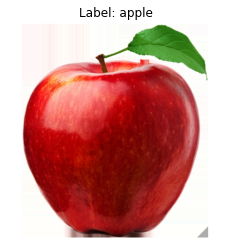

In [51]:
image = cv2.imread(path_train[0])
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(rgb_img)
plt.title("Label: " + labels_train[0])
plt.axis('off')
plt.show()

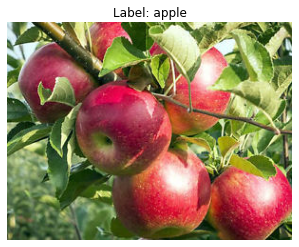

In [52]:
image = cv2.imread(path_test[0])

rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

plt.imshow(rgb_img)
plt.title("Label: " + labels_test[0])
plt.axis('off')
plt.show()

### 

## Resizing images.

In [53]:
X_train = []

for path in path_train:
    img = cv2.imread(path)    
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    final_img =  cv2.resize(rgb_img, (50,50))
    X_train.append(final_img)
    
X_train = np.array(X_train)   

In [54]:
X_train.shape

(240, 50, 50, 3)

In [55]:
X_test = []

for path in path_test:
    img = cv2.imread(path)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    final_img = cv2.resize(rgb_img, (50,50))
    X_test.append(final_img)
    
X_test = np.array(X_test)    

In [56]:
X_test.shape

(60, 50, 50, 3)

#### 

## Creating a Dictionary of labels

In [57]:
fruits = {}

for i in range(len(label_train_unique)):
    fruits[label_train_unique[i]] = i
    
fruits   

{'apple': 0, 'banana': 1, 'mixed': 2, 'orange': 3}

In [58]:
temp_train = []
temp_test = []

for label in labels_train:
    temp_train.append(fruits.get(label))

for label in labels_test:
    temp_test.append(fruits.get(label))

print("Length of train data: ", len(temp_train))
print("Length of test data: ", len(temp_test))

Length of train data:  240
Length of test data:  60


In [59]:
y_train = tensorflow.keras.utils.to_categorical(temp_train, 4)
y_test = tensorflow.keras.utils.to_categorical(temp_test, 4)

Length of X_train:  240


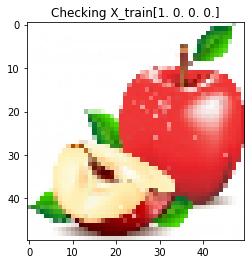

In [23]:
print("Length of X_train: ", len(X_train))
plt.imshow(X_train[34])
plt.title("Checking X_train"+str(y_train[58]))
plt.show()

In [60]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

X_train = X_train / 255.0
X_test = X_test / 255.0

In [61]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

print("\ny_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (240, 50, 50, 3)
X_test shape:  (60, 50, 50, 3)

y_train shape:  (240, 4)
y_test shape:  (60, 4)


In [62]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (50, 50, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding = 'same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation = 'softmax'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [63]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, validation_split = 0.2, shuffle = True)

Epoch 1/150
6/6 [==============================] - 4s 384ms/step - loss: 1.2924 - accuracy: 0.3698 - val_loss: 1.5969 - val_accuracy: 0.0000e+00
Epoch 2/150
6/6 [==============================] - 2s 315ms/step - loss: 1.1936 - accuracy: 0.4948 - val_loss: 1.9558 - val_accuracy: 0.0000e+00
Epoch 3/150
6/6 [==============================] - 2s 335ms/step - loss: 0.9338 - accuracy: 0.6719 - val_loss: 2.1841 - val_accuracy: 0.0000e+00
Epoch 4/150
6/6 [==============================] - 2s 329ms/step - loss: 0.6886 - accuracy: 0.7604 - val_loss: 1.7398 - val_accuracy: 0.1250
Epoch 5/150
6/6 [==============================] - 2s 312ms/step - loss: 0.4829 - accuracy: 0.8177 - val_loss: 1.0892 - val_accuracy: 0.6250
Epoch 6/150
6/6 [==============================] - 2s 312ms/step - loss: 0.4585 - accuracy: 0.8021 - val_loss: 1.4577 - val_accuracy: 0.4375
Epoch 7/150
6/6 [==============================] - 2s 322ms/step - loss: 0.4161 - accuracy: 0.8385 - val_loss: 0.7985 - val_accuracy: 0.7292
E

Epoch 59/150
6/6 [==============================] - 2s 309ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 2.7057 - val_accuracy: 0.5833
Epoch 60/150
6/6 [==============================] - 2s 308ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 3.0090 - val_accuracy: 0.5208
Epoch 61/150
6/6 [==============================] - 2s 329ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 2.3771 - val_accuracy: 0.6250
Epoch 62/150
6/6 [==============================] - 2s 362ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 3.2527 - val_accuracy: 0.5000
Epoch 63/150
6/6 [==============================] - 2s 325ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 4.0565 - val_accuracy: 0.4792
Epoch 64/150
6/6 [==============================] - 2s 329ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 2.9666 - val_accuracy: 0.5208
Epoch 65/150
6/6 [==============================] - 2s 336ms/step - loss: 0.0134 - accuracy: 0.9948 - val_loss: 3.6483 - val_accuracy: 0.5000
Epoch 

6/6 [==============================] - 2s 318ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 3.1565 - val_accuracy: 0.5833
Epoch 117/150
6/6 [==============================] - 2s 343ms/step - loss: 2.7059e-04 - accuracy: 1.0000 - val_loss: 3.0667 - val_accuracy: 0.5833
Epoch 118/150
6/6 [==============================] - 2s 309ms/step - loss: 1.3686e-04 - accuracy: 1.0000 - val_loss: 3.0534 - val_accuracy: 0.6042
Epoch 119/150
6/6 [==============================] - 2s 309ms/step - loss: 5.4627e-04 - accuracy: 1.0000 - val_loss: 2.9508 - val_accuracy: 0.6042
Epoch 120/150
6/6 [==============================] - 2s 312ms/step - loss: 3.9762e-04 - accuracy: 1.0000 - val_loss: 2.7769 - val_accuracy: 0.6667
Epoch 121/150
6/6 [==============================] - 2s 312ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.7391 - val_accuracy: 0.6667
Epoch 122/150
6/6 [==============================] - 2s 312ms/step - loss: 1.5794e-04 - accuracy: 1.0000 - val_loss: 2.7490 - val_accuracy: 

## 

### With Epochs = 50, batch_size = 32, and validation_split = 0.1 

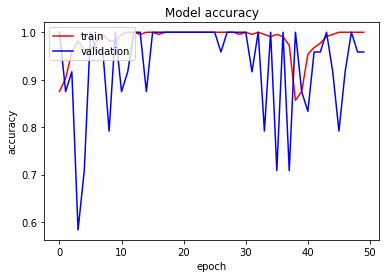

In [67]:
plt.plot(hist1.history['accuracy'], label='train', color="red")
plt.plot(hist1.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

### With Epochs = 150, batch_size = 24, and validation_split = 0.3

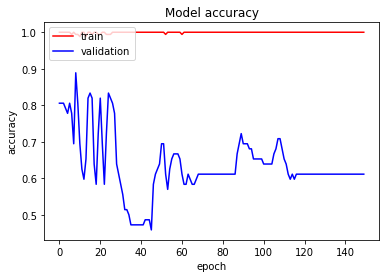

In [34]:
plt.plot(hist.history['accuracy'], label='train', color="red")
plt.plot(hist.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

### With Epochs = 150, batch_size = 32, and validation_split = 0.2 

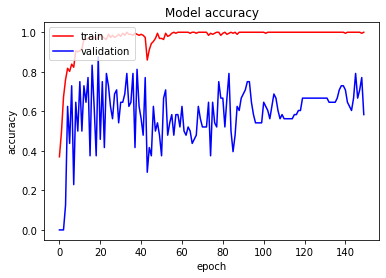

In [64]:
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

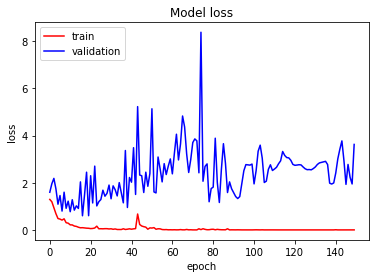

In [69]:
plt.plot(history.history['loss'], label='train', color="red")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Model loss')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [70]:
score, accuracy = model.evaluate(X_test, y_test)
print('Test score achieved:', score)
print('Test accuracy achieved:', accuracy)

2/2 [==============================] - 0s 79ms/step - loss: 1.1603 - accuracy: 0.8833
Test score achieved: 1.1602721214294434
Test accuracy achieved: 0.8833333253860474


In [71]:
pred = model.predict(X_test)

2/2 [==============================] - 2s 75ms/step


In [72]:
fruits

{'apple': 0, 'banana': 1, 'mixed': 2, 'orange': 3}

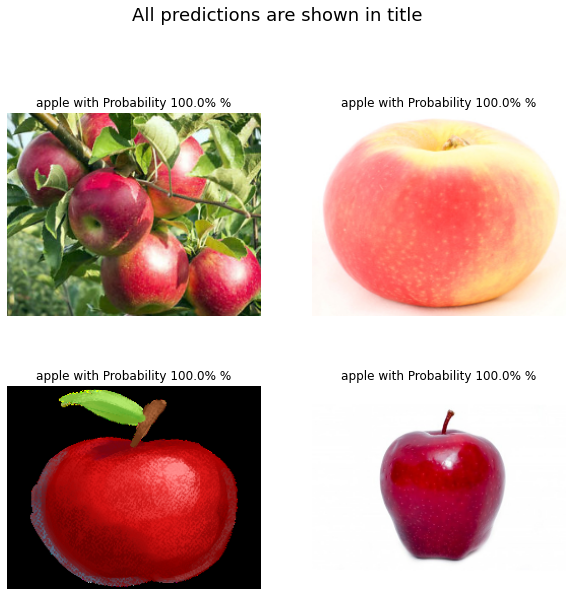

In [73]:
fig, axs= plt.subplots(2,2, figsize=[10,10])
fig.subplots_adjust(hspace=.01)

count=0
for i in range(2):    
    for j in range(2):  
        
        img = cv2.imread(path_test[count])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        img = cv2.resize(img, (250,200))
        result = np.argsort(pred[count])[::-1]
        
        i_max = -1
        max_val = ""
        for (k,val) in enumerate(fruits.keys()):
            
            if(pred[count][k] > i_max):
                i_max = pred[count][k]
                max_val = val
        
        txt = str(max_val) + " with Probability "+ str("{:.4}%".format(i_max*100)) + " %"
            
 
        axs[i][j].imshow(img)
        axs[i][j].set_title(txt)
        axs[i][j].axis('off')

        count+=1
        
plt.suptitle("All predictions are shown in title", fontsize = 18)        
plt.show()


# 

# 

## Testing on random images from the internet

In [81]:
vali = []

img = cv2.imread('download.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
final_img = cv2.resize(rgb_img, (50,50))
vali.append(final_img)
    
vali = np.array(vali)    

model.predict(vali)

1/1 [==============================] - 0s 31ms/step


array([[0., 0., 0., 1.]], dtype=float32)

# 

## Saving & Loading Model

In [101]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [102]:
new_model = tensorflow.keras.models.load_model('model')

In [103]:
vali = []

img = cv2.imread('valid/download.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
final_img = cv2.resize(rgb_img, (50,50))
vali.append(final_img)
    
vali = np.array(vali)    

new_model.predict(vali)

1/1 [==============================] - 0s 136ms/step


array([[0., 0., 0., 1.]], dtype=float32)

## 

## Visual Results

In [86]:
p = model.predict(vali)

1/1 [==============================] - 0s 29ms/step


In [106]:
np.unique(labels_train)

fruits = {}

for i in range(len(np.unique(labels_train))):
    fruits[label_train_unique[i]] = i    

for key,value in fruits.items(): 
    if value == np.argmax(p):
         print( str( round(((np.max(p))*100)) ) + "% " + key )

100% orange


## 

## Thank You!